# Proyecto Individual 2 - Siniestros Viales

## Descripción del problema

Los siniestros viales, también conocidos como accidentes de tráfico o accidentes de tránsito, son eventos que involucran vehículos en las vías públicas y que pueden tener diversas causas, como colisiones entre automóviles, motocicletas, bicicletas o peatones, atropellos, choques con objetos fijos o caídas de vehículos. Estos incidentes pueden tener consecuencias que van desde daños materiales hasta lesiones graves o fatales para los involucrados.

En el contexto de una ciudad como Buenos Aires, los siniestros viales pueden ser una preocupación importante debido al alto volumen de tráfico y la densidad poblacional. Estos incidentes pueden tener un impacto significativo en la seguridad de los residentes y visitantes de la ciudad, así como en la infraestructura vial y los servicios de emergencia.

Las tasas de mortalidad relacionadas con siniestros viales suelen ser un indicador crítico de la seguridad vial en una región. Estas tasas se calculan, generalmente, como el número de muertes por cada cierto número de habitantes o por cada cierta cantidad de vehículos registrados. Reducir estas tasas es un objetivo clave para mejorar la seguridad vial y proteger la vida de las personas en la ciudad.

Es importante destacar que la prevención de siniestros viales involucra medidas como la educación vial, el cumplimiento de las normas de tráfico, la infraestructura segura de carreteras y calles, así como la promoción de vehículos más seguros. El seguimiento de las estadísticas y la implementación de políticas efectivas son esenciales para abordar este problema de manera adecuada.

### Contexto

En Argentina, cada año mueren cerca de 4.000 personas en siniestros viales. Aunque muchas jurisdicciones han logrado disminuir la cantidad de accidentes de tránsito, esta sigue siendo la principal causa de muertes violentas en el país. Los informes del Sistema Nacional de Información Criminal (SNIC), del Ministerio de Seguridad de la Nación, revelan que entre 2018 y 2022 se registraron 19.630 muertes en siniestros viales en todo el país. Estas cifras equivalen a 11 personas por día que resultaron víctimas fatales por accidentes de tránsito.

Solo en 2022, se contabilizaron 3.828 muertes fatales en este tipo de hechos. Los expertos en la materia indican que en Argentina es dos o tres veces más alta la probabilidad de que una persona muera en un siniestro vial que en un hecho de inseguridad delictiva.

### Diccionarios de Datos

#### Hoja Homicidios

| Variables     | Descripción                      |
|---------------|----------------------------------|
| ID            | Identificador unico del siniestro|
| N_VICTIMAS    | Cantidad de víctimas|
| FECHA         | Fecha en formato dd/mm/aaaa|
| AAAA          | Año |
| MM| Mes|
| DD| Día del mes|
| HORA | Hora del siniestro|
| LUGAR_DEL_HECHO| Dirección del hecho|
| TIPO_DE_CALLE| Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la mayor jerarquía|
| Calle| Nombre de la arteria donde se produjo el hecho|
| Altura| Altura de la arteria donde se produjo el hecho|
| Cruce| Cruce en caso de que sea una encrucijada|
| Dirección Normalizada| Dirección en formato normalizado USIG|
| COMUNA| Comuna de la ciudad (1 a 15)|
| XY (CABA)| Geocodificación plana|
| pos x| Longitud con separador punto. WGS84|
| pos y| Latitud con separador punto. WGS84|
| PARTICIPANTES| Conjunción de víctima y acusado|
| VICTIMA| Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos|
| ACUSADO|	Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal|


#### Hoja Victimas

| Variables| Descripción|
|---------------|----------------------------------|
| ID_hecho|	Identificador unico del siniestro|
| FECHA| Fecha en formato dd/mm/aaaa|
| AAAA|	Año|
| MM| Mes|
| DD| Día del mes|
| ROL| Posición relativa al vehículo que presentaba la víctima en el momento del siniestro|
| VICTIMA| Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.|
| SEXO| Sexo informado por fuente policial de la víctima|
| EDAD|	Edad de la víctima al momento del siniestro|
| FECHA_FALLECIMIENTO| Fecha de fallecimiento de la víctima|

In [1]:
# Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Opciones de visualización
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 30)
pd.set_option('display.precision', 2)


In [3]:
# Ruta al archivo Excel
file_path = '../data/homicidios.xlsx'

# Cargar la hoja de datos de homicidios
homicidios = pd.read_excel(file_path, sheet_name='HECHOS')

# Cargar la hoja de datos de víctimas
victimas = pd.read_excel(file_path, sheet_name='VICTIMAS')

# Unir los DataFrames con la clave ID del hecho
homicidios_con_victimas_df = pd.merge(homicidios, victimas, left_on='ID', right_on='ID_hecho', how='left')

# Mostrar el resultado del dataframe combinado
homicidios_con_victimas_df.head(10)


,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,...,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,...,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,...,-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,NOGOYA,NaN,"GONZALEZ, JOAQUIN V.","NOGOYA y GONZALEZ, JOAQUIN V.",11,...,-58.50095869,-34.60825440,MOTO-AUTO,MOTO,AUTO,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,...,-58.50877521,-34.66977709,MOTO-AUTO,MOTO,AUTO,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00
8,2016-0012,1,2016-02-08,2016,2,8,01:20:00,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,BELGRANO AV.,NaN,"IRIGOYEN, BERNARDO DE","BELGRANO AV. e IRIGOYEN, BERNARDO DE",1,...,-58.38048577,-34.61303893,MOTO-CARGAS,MOTO,CARGAS,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22,2016-02-08 00:00:00
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,ENTRE RIOS AV.,1366.0,NaN,ENTRE RIOS AV. 1366,1,...,-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16,2016-02-10 00:00:00


In [4]:
# Cuáles son las columnas resultantes?
homicidios_con_victimas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA_x                717 non-null    datetime64[ns]
 3   AAAA_x                 717 non-null    int64         
 4   MM_x                   717 non-null    int64         
 5   DD_x                   717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [6]:
# Seleccionar las columnas relevantes para el análisis y construcción del dashboard
columnas_seleccionadas = ['ID','FECHA_x', 'AAAA_x', 'MM_x', 'HORA', 'pos x', 'pos y', 'TIPO_DE_CALLE', 'COMUNA', 'VICTIMA_x', 'ACUSADO', 'N_VICTIMAS', 'ROL', 'SEXO', 'EDAD']
homicidios_df = homicidios_con_victimas_df[columnas_seleccionadas].copy()

# Convertir las columnas de posición (longitud y latitud) a valores numéricos
homicidios_df.loc[:, 'pos x'] = pd.to_numeric(homicidios_df['pos x'], errors='coerce')
homicidios_df.loc[:, 'pos y'] = pd.to_numeric(homicidios_df['pos y'], errors='coerce')

# Reemplazar los valores faltantes en 'pos x' y 'pos y' por 'SD' (sin datos) como estrategia para valores faltantes
homicidios_df.loc[:, 'pos x'] = homicidios_df['pos x'].fillna(0)
homicidios_df.loc[:, 'pos y'] = homicidios_df['pos y'].fillna(0)

# Renombrar las columnas con un nombre legible
homicidios_df.rename(columns={'FECHA_x': 'FECHA'}, inplace=True)
homicidios_df.rename(columns={'VICTIMA_x': 'VICTIMA'}, inplace=True)
homicidios_df.rename(columns={'AAAA_x': 'AÑO'}, inplace=True)
homicidios_df.rename(columns={'MM_x': 'MES'}, inplace=True)

# Verificar los primeros registros del conjunto de datos actualizado
homicidios_df.head(10)

,ID,FECHA,AÑO,MES,HORA,pos x,pos y,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,N_VICTIMAS,ROL,SEXO,EDAD
0,2016-0001,2016-01-01,2016,1,04:00:00,-58.48,-34.69,AVENIDA,8,MOTO,AUTO,1,CONDUCTOR,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,01:15:00,-58.51,-34.67,GRAL PAZ,9,AUTO,PASAJEROS,1,CONDUCTOR,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,07:00:00,-58.39,-34.63,AVENIDA,1,MOTO,AUTO,1,CONDUCTOR,MASCULINO,30
3,2016-0004,2016-01-10,2016,1,00:00:00,-58.47,-34.68,AVENIDA,8,MOTO,SD,1,CONDUCTOR,MASCULINO,18
4,2016-0005,2016-01-21,2016,1,05:20:00,-58.39,-34.62,AVENIDA,1,MOTO,PASAJEROS,1,CONDUCTOR,MASCULINO,29
5,2016-0008,2016-01-24,2016,1,18:30:00,-58.44,-34.68,AVENIDA,8,MOTO,OBJETO FIJO,1,CONDUCTOR,MASCULINO,30
6,2016-0009,2016-01-24,2016,1,19:10:00,-58.5,-34.61,CALLE,11,MOTO,AUTO,1,PASAJERO_ACOMPAÑANTE,MASCULINO,29
7,2016-0010,2016-01-29,2016,1,15:20:00,-58.51,-34.67,GRAL PAZ,9,MOTO,AUTO,1,CONDUCTOR,MASCULINO,18
8,2016-0012,2016-02-08,2016,2,01:20:00,-58.38,-34.61,AVENIDA,1,MOTO,CARGAS,1,CONDUCTOR,MASCULINO,22
9,2016-0013,2016-02-10,2016,2,11:30:00,-58.39,-34.62,AVENIDA,1,PEATON,AUTO,1,PEATON,MASCULINO,16


In [7]:
# Hacemos la corrección también de la columna HORA con una función
def corregir_formato_hora(hora):
    # Verificar si 'hora' es una instancia de str
    if isinstance(hora, str):
        try:
            # Intentar convertir a datetime y luego a la hora en formato correcto
            hora_corregida = datetime.strptime(hora, '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S')
        except ValueError:
            # Si hay un error en la conversión, retornar la hora original
            return hora
        return hora_corregida
    else:
        # Si 'hora' no es una cadena, asumir que ya está en el formato correcto
        return hora

homicidios_df['HORA'] = homicidios_df['HORA'].apply(corregir_formato_hora)

In [8]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             717 non-null    object        
 1   FECHA          717 non-null    datetime64[ns]
 2   AÑO            717 non-null    int64         
 3   MES            717 non-null    int64         
 4   HORA           717 non-null    object        
 5   pos x          717 non-null    object        
 6   pos y          717 non-null    object        
 7   TIPO_DE_CALLE  717 non-null    object        
 8   COMUNA         717 non-null    int64         
 9   VICTIMA        717 non-null    object        
 10  ACUSADO        717 non-null    object        
 11  N_VICTIMAS     717 non-null    int64         
 12  ROL            717 non-null    object        
 13  SEXO           717 non-null    object        
 14  EDAD           717 non-null    object        
dtypes: datetime64[ns](1), i

### Observaciones
* Seleccionamos aquellas columnas que nos permitirán obtener información relevante para el dashboard y eliminamos las columnas que pueden tener información redundante que otras columnas ya nos entregan.

* También se ha hecho conversión a los datos que necesitamos sean númericos y los valores faltantes no se han eliminado de los registros porque todos los siniestros con consecuencias mortales son importantes para el análisis.

* En el caso de no tener valores para la ubicación se reemplazó por el valor SD (Sin Dato) que nos indica que para ese registro, en particular, no tenemos esa información.

In [9]:
# Verificación de valores faltantes
valores_faltantes = homicidios_df.isna().sum()
valores_faltantes

ID               0
FECHA            0
AÑO              0
MES              0
HORA             0
pos x            0
pos y            0
TIPO_DE_CALLE    0
COMUNA           0
VICTIMA          0
ACUSADO          0
N_VICTIMAS       0
ROL              0
SEXO             0
EDAD             0
dtype: int64

* No tenemos valores faltantes adicionales aparentemente, sin embargo los datos faltantes aparecen como SD (Sin Dato)

In [10]:
# Verificamos cuántos valores SD tengo en el Dataframe
SD_por_columna = (homicidios_df == "SD").sum()
SD_por_columna

ID                0
FECHA             0
AÑO               0
MES               0
HORA              1
pos x             0
pos y             0
TIPO_DE_CALLE     0
COMUNA            0
VICTIMA           9
ACUSADO          23
N_VICTIMAS        0
ROL              11
SEXO              6
EDAD             53
dtype: int64

Dado que toda la información es muy sensible, las estrategias de reemplazo para estos valores SD tendrían mucho impacto en la información y dar una estadística errónea.
Se conservarán teniendo en cuenta que serán un valor especial de las variables categóricas

In [11]:
# Verificación de registros duplicados
registros_duplicados = homicidios_df.duplicated().sum()
registros_duplicados

0

* No tenemos registros duplicados

## Análisis numérico

In [12]:
# Análizamos los datos numéricos para detectar anomalías
homicidios_df.describe().T

,count,mean,min,25%,50%,75%,max,std
FECHA,717,2018-09-09 01:24:21.087866112,2016-01-01 00:00:00,2017-04-01 00:00:00,2018-07-07 00:00:00,2019-12-18 00:00:00,2021-12-30 00:00:00,NaN
AÑO,717.0,2018.17,2016.0,2017.0,2018.0,2019.0,2021.0,1.67
MES,717.0,6.69,1.0,4.0,7.0,10.0,12.0,3.58
COMUNA,717.0,7.43,0.0,4.0,8.0,11.0,15.0,4.39
N_VICTIMAS,717.0,1.06,1.0,1.0,1.0,1.0,3.0,0.26


In [13]:
# Encontramos una Comuna 0, es decir un dato que no corresponde a ninguna comuna.
homicidios_df[homicidios_df['COMUNA']==0]

,ID,FECHA,AÑO,MES,HORA,pos x,pos y,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,N_VICTIMAS,ROL,SEXO,EDAD
121,2016-0151,2016-11-18,2016,11,20:35:00,0.0,0.0,CALLE,0,PEATON,SD,1,PEATON,SD,SD
141,2016-0174,2016-12-27,2016,12,00:00:00,0.0,0.0,AUTOPISTA,0,SD,SD,1,SD,SD,SD


In [14]:
# Buscamos la comuna más frecuente en el 2016, año de los registros con esta Comuna 0 y los imputamos para no tener este outlier
# Filtrar los datos para el año 2016
data_2016 = homicidios_df[homicidios_df['AÑO'] == 2016]

# Encontrar la comuna más común en 2016
comuna_mas_comun_2016 = data_2016['COMUNA'].mode()[0]
comuna_mas_comun_2016

1

In [15]:
# Reemplazar los registros con "Comuna 0" por la Comuna más frecuente
homicidios_df['COMUNA'].replace(0, comuna_mas_comun_2016, inplace=True)

In [16]:
# Guardar el DataFrame 'homicidios_df' en un archivo CSV
homicidios_df.to_csv('../data/homicidios.csv', index=False)

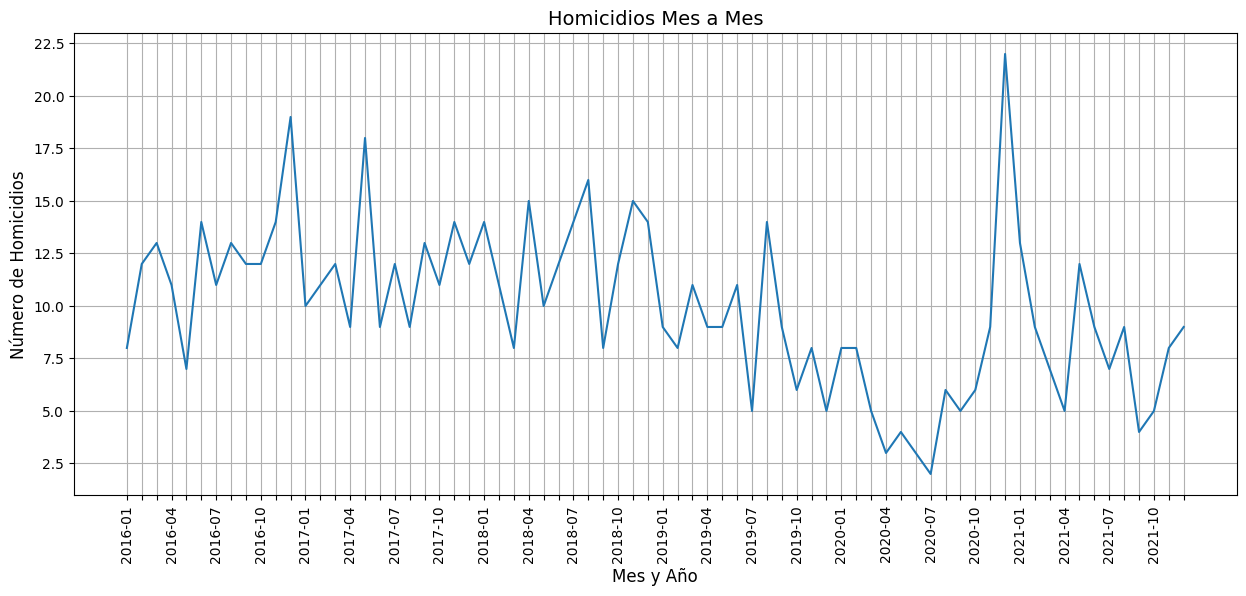

In [17]:
# Concatenar las columnas 'AÑO' y 'MES' para crear 'MES_AÑO'
homicidios_df['MES_AÑO'] = homicidios_df['AÑO'].astype(str) + "-" + homicidios_df['MES'].astype(str).str.zfill(2)

# Agrupar los datos por 'MES_AÑO' y contar los homicidios
homicidios_mes = homicidios_df.groupby('MES_AÑO').size()

# Crear la gráfica de líneas
plt.figure(figsize=(15, 6))
sns.lineplot(x=homicidios_mes.index, y=homicidios_mes.values)

# Estilizar la gráfica
plt.xticks(rotation=90)
# Establecer las etiquetas del eje X con una rotación de 45 grados y mostrar solo algunas etiquetas
every_nth = 3
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Mes y Año', fontsize=12)
plt.ylabel('Número de Homicidios', fontsize=12)
plt.title('Homicidios Mes a Mes', fontsize=14)
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Observaciones

* Se puede observar que en general los accidentes mortales han disminuido notablemente, teniendo un pico muy alto en el diciembre del año 2020.

* Valdría la pena revisar este mes en particular (2020-12) analizando las principales.

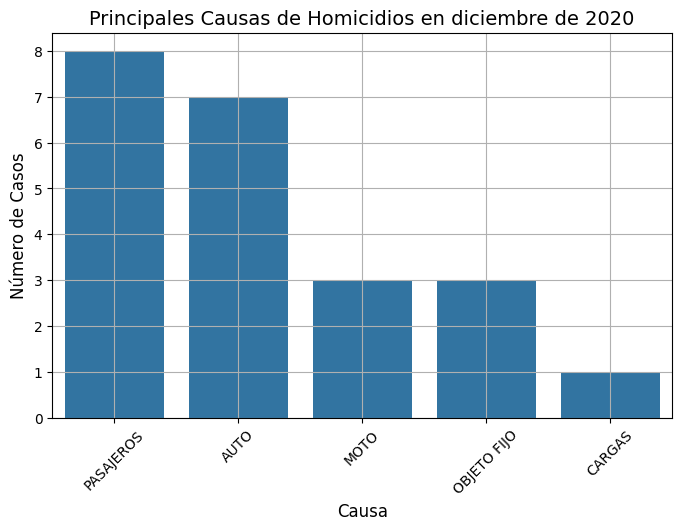

In [18]:
# Filtrar los datos para el mes de noviembre de 2020
data_diciembre_2020 = homicidios_df[(homicidios_df['MES_AÑO'] == '2020-12')]

# Contar las ocurrencias de cada causa (CAUSADO)
causas_diciembre_2020 = data_diciembre_2020['ACUSADO'].value_counts()

# Crear el gráfico de barras para las causas
plt.figure(figsize=(8, 5))
sns.barplot(x=causas_diciembre_2020.index, y=causas_diciembre_2020.values)

# Estilizar la gráfica
plt.xticks(rotation=45)
plt.xlabel('Causa', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.title('Principales Causas de Homicidios en diciembre de 2020', fontsize=14)
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Observaciones

* Se aprecia que la principal causa de accidentes mortales en el mes de diciembre de 2020 ha sido por causa de pasajeros (8) y de autos (7).

* Recordando el significado de pasajeros: personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotransporte público de pasajeros/as y ómnibus de larga distancia

* La otra causa ha sido por auto: vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc)

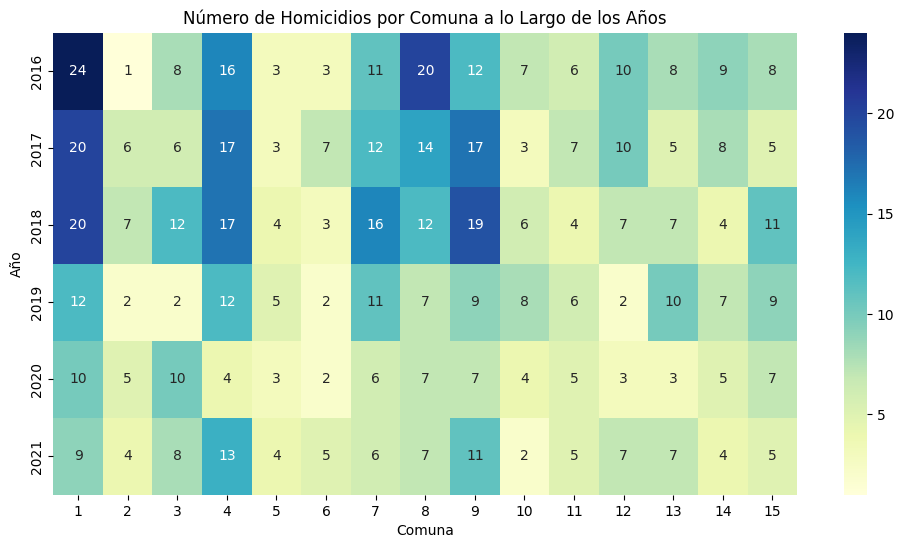

In [19]:
# Análisis de Tendencias y Patrones por Comuna

# Calcular estadísticas clave del número de víctimas por comuna
estadisticas_victimas_por_comuna = homicidios_df.groupby('COMUNA')['N_VICTIMAS'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by='count', ascending=False)

# Comparación temporal del número de homicidios por comuna a lo largo de los años
homicidios_temporales_comuna = homicidios_df.groupby(['AÑO', 'COMUNA']).size().unstack(fill_value=0)

# Visualización: Número de Homicidios por Comuna a lo largo de los Años
plt.figure(figsize=(12, 6))
sns.heatmap(homicidios_temporales_comuna, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Número de Homicidios por Comuna a lo Largo de los Años')
plt.xlabel('Comuna')
plt.ylabel('Año')
plt.show()

### Observaciones

* Algunas comunas tienen un número significativamente mayor de homicidios como la comuna 1, 3, 4 y 9 en comparación con otras, en el último año.

* Se aprecia que en la comuna 1, 7, 8, 10 y 15 los homicidios han disminuido notablemente. Lo que valdría la pena revisar que políticas públicas se aplicaron adecuadamente allí y que acciones posibilitaron su disminución.

* Es importante revisar el estado la infraestructura en esas comunas, condiciones de seguridad y factores socioeconómicos que puedan afectar el indicador.

### Observaciones

* Dados los gráficos representados, hay una concentración alta en los meses de diciembre y de agosto. Lo que valdría la pena revisar qué eventos se realizan en esas fechas y que posibles fiestas temporales son los que están relaciones directamente con los accidentes mortales.

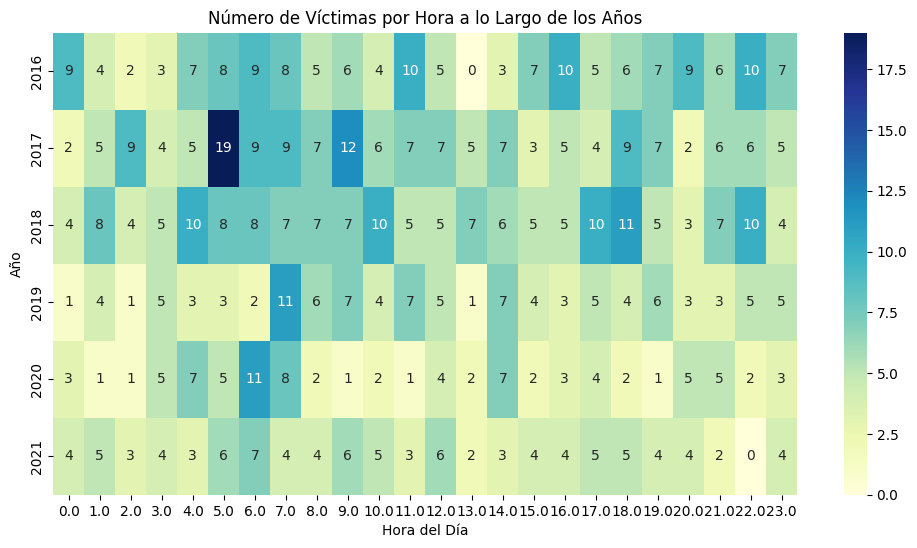

In [20]:
# Convertir la columna 'HORA' a un formato de hora y extraer la hora del día
homicidios_df['HORA'] = pd.to_datetime(homicidios_df['HORA'], format='%H:%M:%S', errors='coerce').dt.hour

# Filtrar los registros donde la hora es nula (debido a valores como 'SD')
homicidios_df = homicidios_df.dropna(subset=['HORA'])

# Agrupar los datos por año y hora para sumar el número de víctimas
homicidios_por_hora_ano = homicidios_df.groupby(['AÑO', 'HORA'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Visualización de número de víctimas por hora a lo largo de los años
plt.figure(figsize=(12, 6))
sns.heatmap(homicidios_por_hora_ano, cmap="YlGnBu", annot=True)
plt.title('Número de Víctimas por Hora a lo Largo de los Años')
plt.xlabel('Hora del Día')
plt.ylabel('Año')
plt.show()

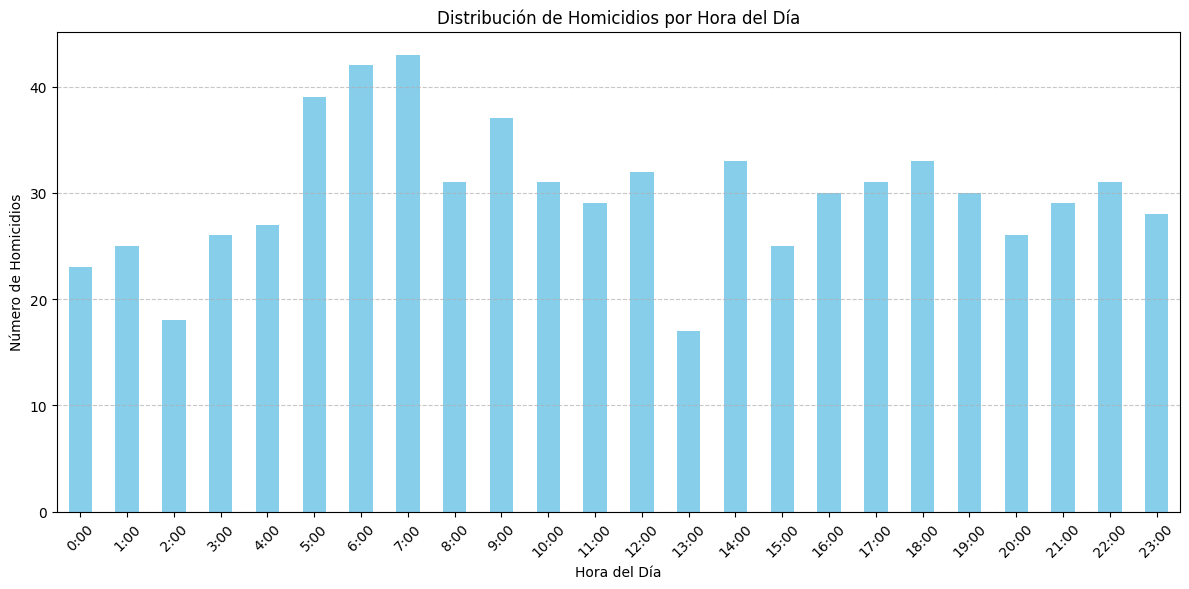

In [26]:
# Contar la cantidad de homicidios por hora
homicidios_por_hora = homicidios_df['HORA'].value_counts().sort_index()

# Gráfica de la distribución de homicidios por hora
plt.figure(figsize=(12, 6))
homicidios_por_hora.plot(kind='bar', color='skyblue')
plt.title('Distribución de Homicidios por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Homicidios')
plt.xticks(range(0, 24), labels=[f"{hora}:00" for hora in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Observaciones

* Se observa como es de suponerse que las horas donde más se presentan accidentes mortales es durante algunas horas pico. Esto corresponde a las horas que comienza la jornada laboral y medio día. 

* La tendencia de homicidios en la tarde o al finalizar la jornada ha disminuido considerablemente a lo largo de los años. Importante revisar las razones de esto, es posible que los accidentes materiales son los que se hayan incrementado en esa hora al tener mayor cantidad de carros y menor velocidad.

* También cabe destacar que la iluminación no es un factor que causa los accidentes mortales, ya que la mayoría de los casos se reportan en las horas de la mañana.

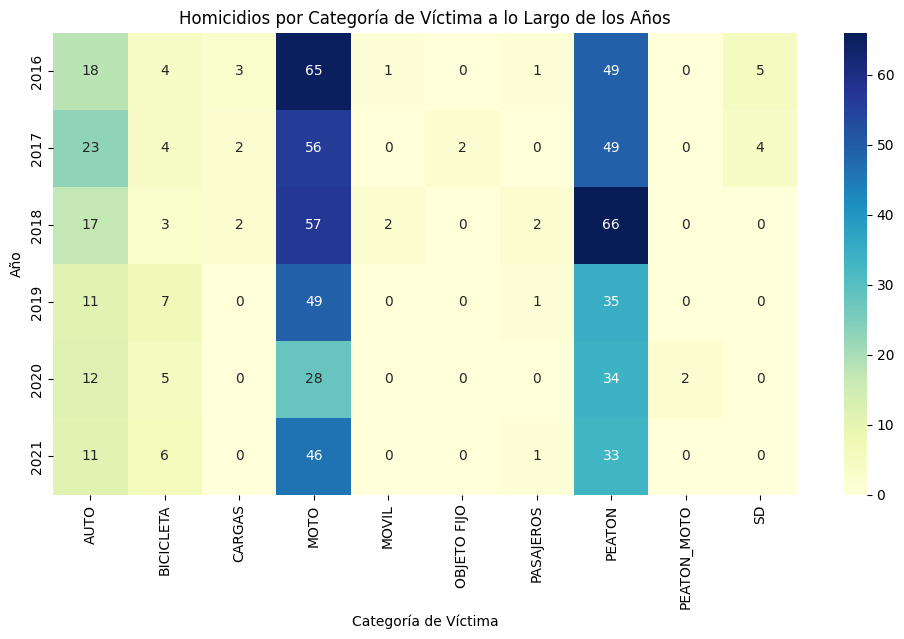

In [13]:
# Análisis de las categorías de víctimas

# Agrupar los datos por año y categoría de víctima, y contar los casos
victimas_por_año = homicidios_df.groupby(['AÑO', 'VICTIMA']).size().unstack(fill_value=0)

# Visualización de víctimas por año
plt.figure(figsize=(12, 6))
sns.heatmap(victimas_por_año, cmap="YlGnBu", annot=True)
plt.title('Homicidios por Categoría de Víctima a lo Largo de los Años')
plt.xlabel('Categoría de Víctima')
plt.ylabel('Año')
plt.show()


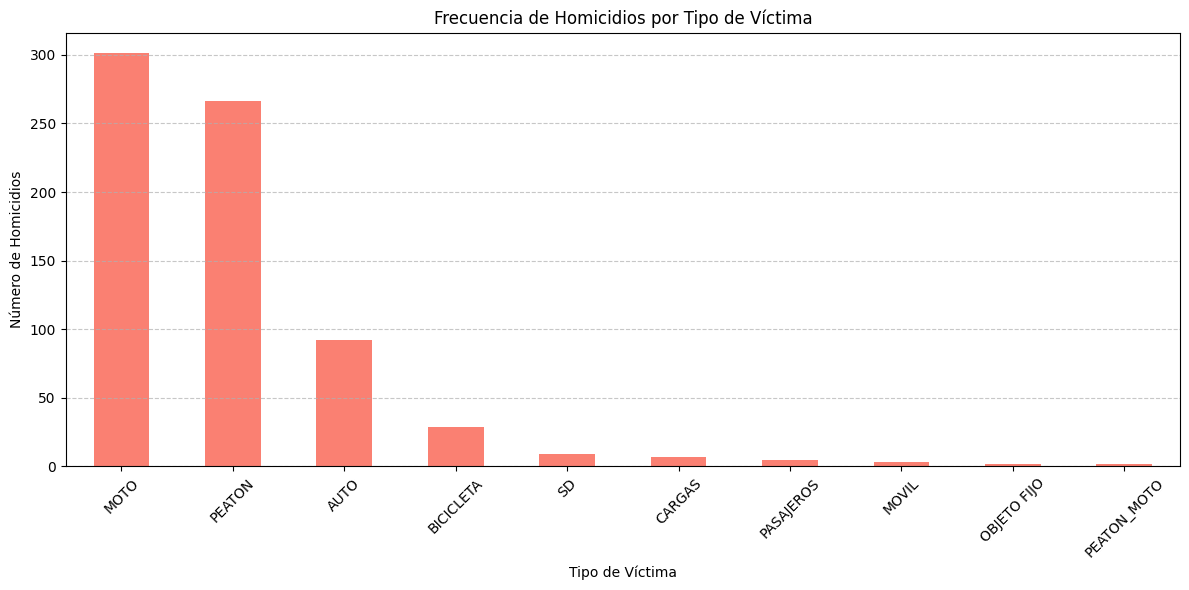

In [29]:
# Contar la cantidad de homicidios por tipo de víctima
homicidios_por_tipo_victima = homicidios_df['VICTIMA'].value_counts()

# Gráfica de la distribución de homicidios por tipo de víctima
plt.figure(figsize=(12, 6))
homicidios_por_tipo_victima.plot(kind='bar', color='salmon')
plt.title('Frecuencia de Homicidios por Tipo de Víctima')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observaciones

* Se observa que las principales victimas de los homicidios en siniestros viales son las motos y los peatones, con una diferencia bastante grande con respecto a las otras categorías. Es decir que las campañas o acciones que estuvieran diseñadas para este público tendrían gran impacto.

* Las víctimas de vehículo han disminuido considerablemente y las de bicicleta vienen en aumento, debido principalmente a su uso se puede asumir.

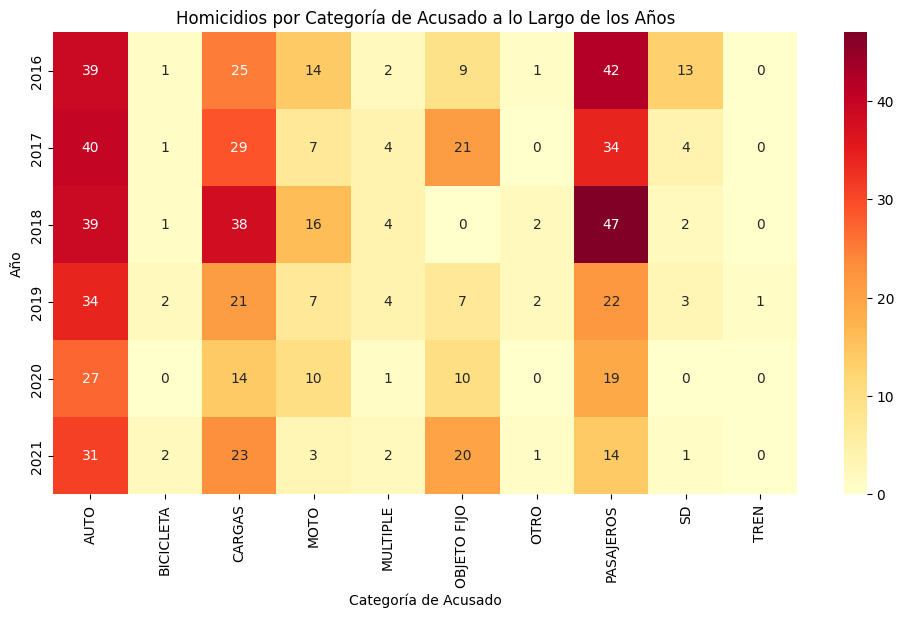

In [14]:
# Análisis de las categorías de acusados

# Agrupar los datos por año y categoría de acusado, y contar los casos
acusados_por_año = homicidios_df.groupby(['AÑO', 'ACUSADO']).size().unstack(fill_value=0)

# Visualización de acusados por año
plt.figure(figsize=(12, 6))
sns.heatmap(acusados_por_año, cmap="YlOrRd", annot=True)
plt.title('Homicidios por Categoría de Acusado a lo Largo de los Años')
plt.xlabel('Categoría de Acusado')
plt.ylabel('Año')
plt.show()

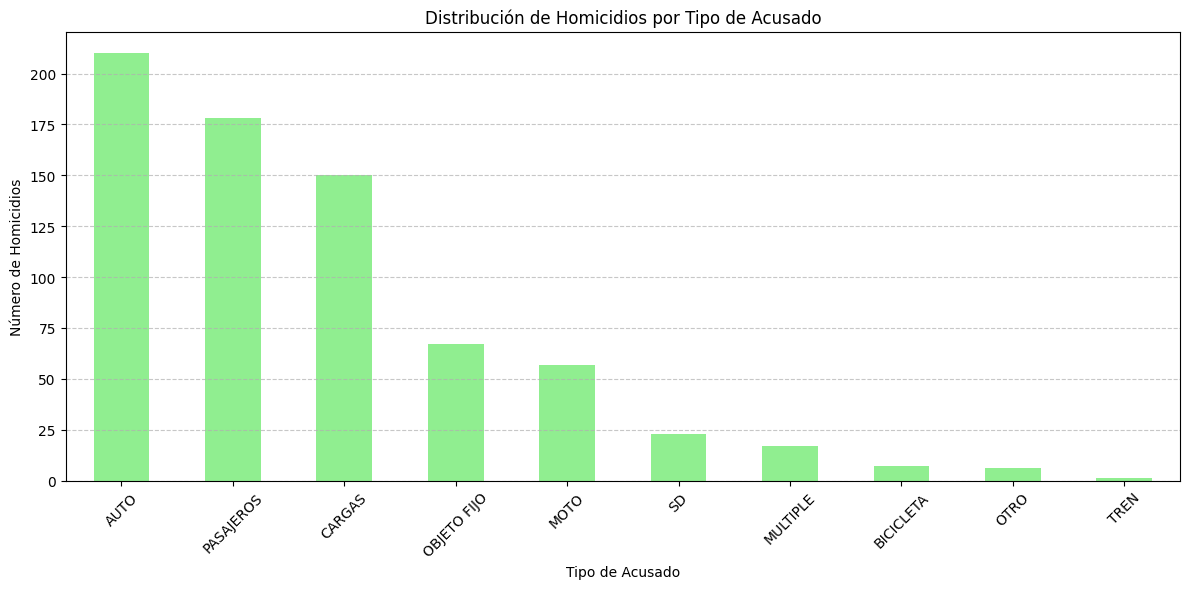

In [30]:
# Contar la cantidad de homicidios por tipo de acusado
homicidios_por_tipo_acusado = homicidios_df['ACUSADO'].value_counts()

# Gráfica de la distribución de homicidios por tipo de acusado
plt.figure(figsize=(12, 6))
homicidios_por_tipo_acusado.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Homicidios por Tipo de Acusado')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observaciones

* Los autos continuan a lo largo del tiempo como los principales acusados de los homicidios en siniestros viales en CABA. Siendo el actor más importante a impactar y a desarrollar políticas para su manejo. 

* Los objetos fijos tienen un incremento notable en el último año, se verificará si son en diferentes comunas posteriormente.

* Los pasajeros aunque son otro tipo fuerte como acusados, disminuyen notablemente a lo largo del tiempo. Es posible que por campañas de información ciudadanas y mejor señalización.

In [32]:
# Realizaremos una consulta por comuna para determinar si los objetos fijos están concentrados en una localidad
# Filtrar los datos para el último año disponible y para la categoría de acusado "OBJETO FIJO"
ultimo_año = homicidios_df['AÑO'].max()
datos_ultimo_año_objeto_fijo = homicidios_df[(homicidios_df['AÑO'] == ultimo_año) & 
                                                 (homicidios_df['ACUSADO'] == 'OBJETO FIJO')]

# Conteo de casos de "OBJETO FIJO" como acusado por comuna
conteo_objeto_fijo_comuna = datos_ultimo_año_objeto_fijo['COMUNA'].value_counts()

conteo_objeto_fijo_comuna


COMUNA
7     2
15    2
8     2
12    2
3     2
11    2
9     2
6     1
10    1
4     1
5     1
2     1
1     1
Name: count, dtype: int64

### Observaciones

Dada la consulta realizada no se distingue ninguna particularidad cuando el objeto fijo es el acusado del siniestro. Los accidentes mortales con objetos fijos están distribuidos de manera más o menos uniforme a lo largo de las comunas de CABA.

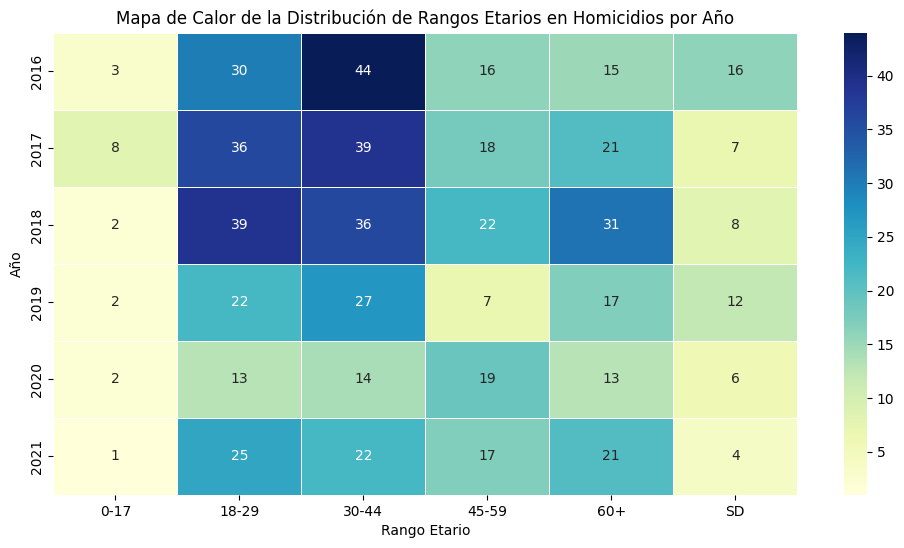

In [34]:
# Convertir y categorizar la columna 'EDAD'
homicidios_df.loc[:, 'EDAD'] = pd.to_numeric(homicidios_df['EDAD'], errors='coerce')
bins = [0, 17, 29, 44, 59, float('inf')]
labels = ['0-17', '18-29', '30-44', '45-59', '60+']

# Creamos una nueva columna para los rangos etarios
homicidios_df.loc[:, 'Rango_Etario'] = pd.cut(homicidios_df['EDAD'], bins=bins, labels=labels, right=False)
homicidios_df.loc[:, 'Rango_Etario'] = homicidios_df['Rango_Etario'].cat.add_categories('SD')

# Asignar 'SD' a los casos donde la edad era desconocida
homicidios_df.loc[homicidios_df['EDAD'].isna(), 'Rango_Etario'] = 'SD'

# Análisis de rangos etarios a lo largo de los años
rango_etario_por_año = pd.crosstab(homicidios_df['AÑO'], homicidios_df['Rango_Etario'])

# Crear un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(rango_etario_por_año, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Mapa de Calor de la Distribución de Rangos Etarios en Homicidios por Año')
plt.xlabel('Rango Etario')
plt.ylabel('Año')
plt.show()

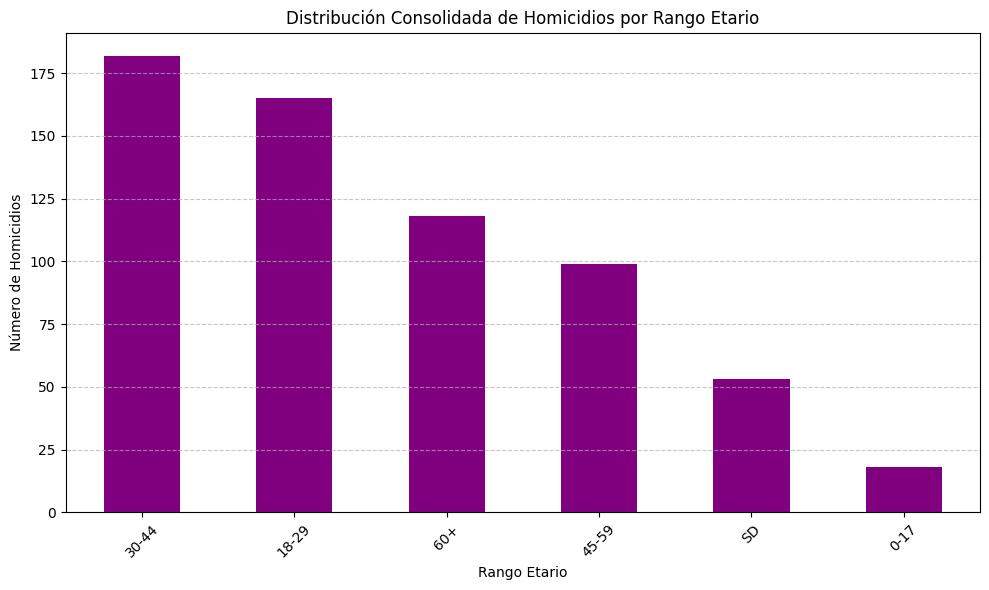

In [35]:
# Contar la cantidad de homicidios por rango etario
homicidios_por_rango_etario = homicidios_df['Rango_Etario'].value_counts()

# Gráfica de barras para la distribución de homicidios por rango etario
plt.figure(figsize=(10, 6))
homicidios_por_rango_etario.plot(kind='bar', color='purple')
plt.title('Distribución Consolidada de Homicidios por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observaciones

* A pesar de que a lo largo de los años se ve una disminución de las muertes en todas las edades, continúa siendo importante la participación de las edades de 18-29, 30-44 y 60+. Lo que indica que esta es un población que debe ser dirigida en campañas y en acciones para la prevención de accidentes viales.

* Cabe destacar los accidentes mortales con adultos mayores que no están en edad productiva y que son víctimas frecuentes. Importante la sensibilización a esta población.

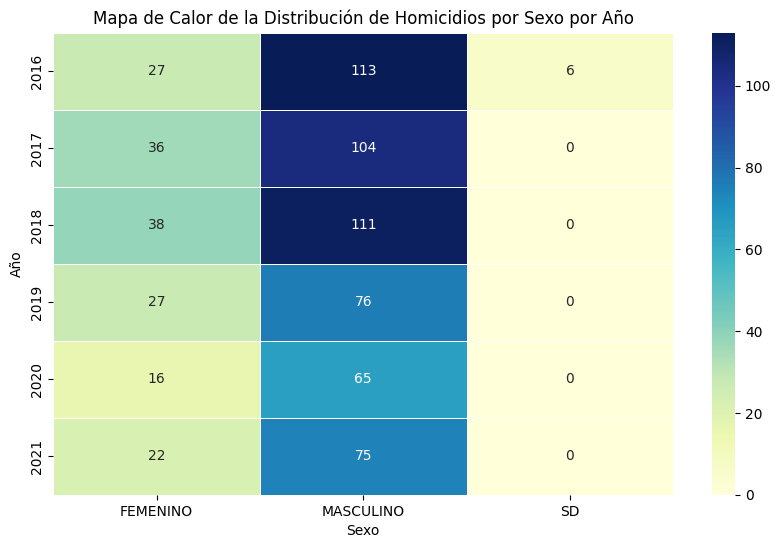

In [36]:
# Análisis de la distribución de homicidios por sexo a lo largo de los años
sexo_por_año = pd.crosstab(homicidios_df['AÑO'], homicidios_df['SEXO'])

# Crear un mapa de calor para la distribución de homicidios por sexo a lo largo de los años
plt.figure(figsize=(10, 6))
sns.heatmap(sexo_por_año, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

plt.title('Mapa de Calor de la Distribución de Homicidios por Sexo por Año')
plt.xlabel('Sexo')
plt.ylabel('Año')
plt.show()


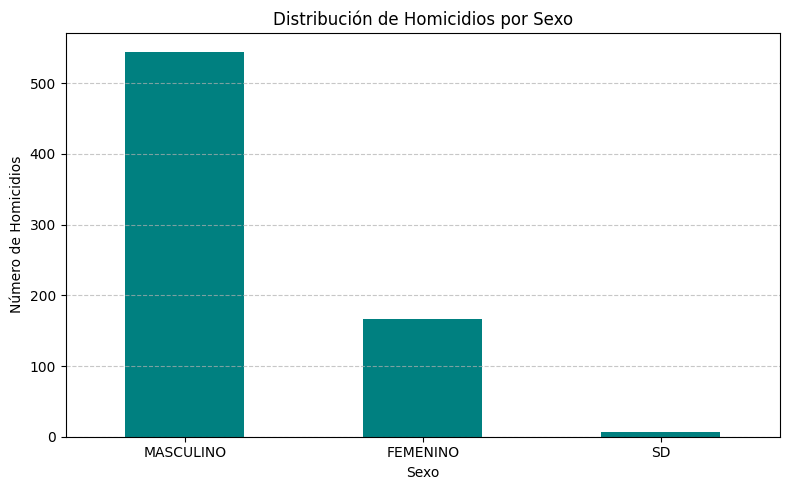

In [37]:
# Contar la cantidad de homicidios por sexo
homicidios_por_sexo = homicidios_df['SEXO'].value_counts()

# Gráfica de barras para la distribución de homicidios por sexo
plt.figure(figsize=(8, 5))
homicidios_por_sexo.plot(kind='bar', color='teal')
plt.title('Distribución de Homicidios por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


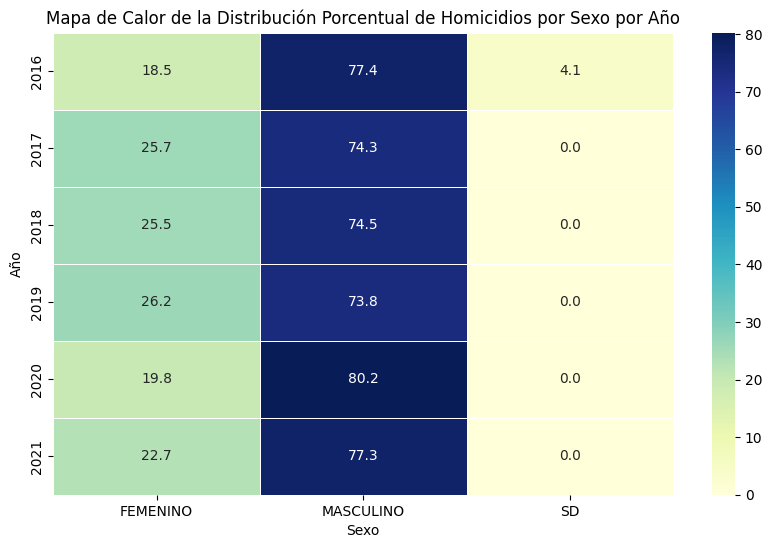

In [31]:
# Calcular el porcentaje de homicidios por sexo por año
sexo_por_año_porcentaje = sexo_por_año.div(sexo_por_año.sum(axis=1), axis=0) * 100

# Crear un mapa de calor para la distribución de homicidios por sexo en porcentajes a lo largo de los años
plt.figure(figsize=(10, 6))
sns.heatmap(sexo_por_año_porcentaje, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

plt.title('Mapa de Calor de la Distribución Porcentual de Homicidios por Sexo por Año')
plt.xlabel('Sexo')
plt.ylabel('Año')
plt.show()



### Observaciones

* Con los gráficos obtenidos podemos ver que la tendencia de la población masculina como victima de los siniestros mortales se mantiene a lo largo de los años. Dicho esto, continua siendo una preocupación de esta población para su seguridad vial y las campañas de prevención.

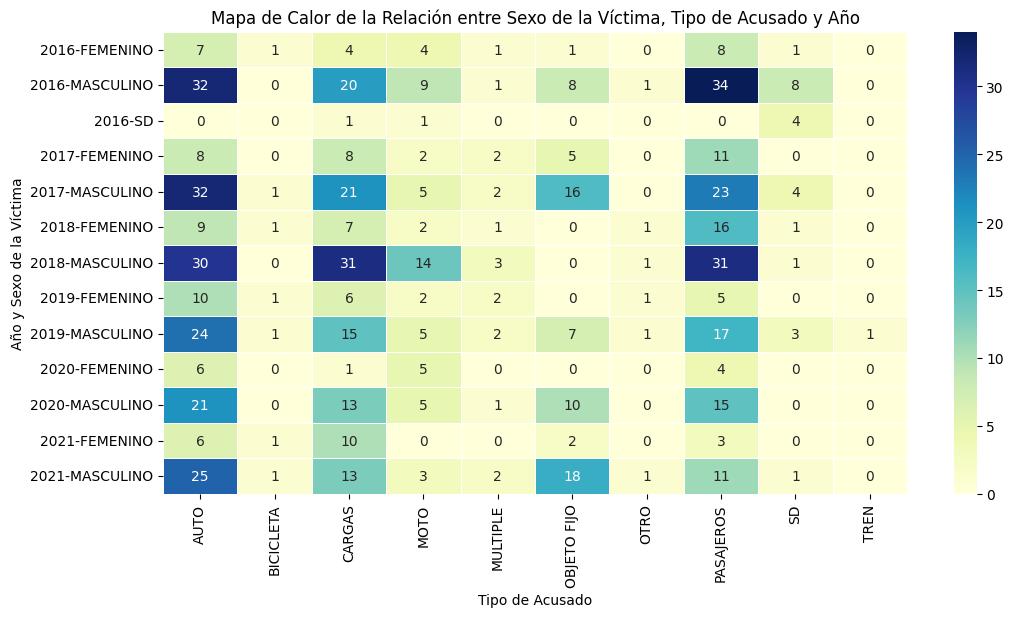

In [33]:
# Realizar un análisis de la relación entre el sexo de la víctima, el tipo de acusado y el año
relacion_sexo_victima_acusado_año = pd.crosstab(index=[homicidios_df['AÑO'], homicidios_df['SEXO']], 
                                                columns=homicidios_df['ACUSADO'])

# Crear un mapa de calor para la relación entre sexo de la víctima, tipo de acusado y año
plt.figure(figsize=(12, 6))
sns.heatmap(relacion_sexo_victima_acusado_año, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

plt.title('Mapa de Calor de la Relación entre Sexo de la Víctima, Tipo de Acusado y Año')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Año y Sexo de la Víctima')
plt.show()

### Observaciones

* Se observa que la mayoría de los accidentes que sufre la población masculina son principalmente por autos, cargas y objetos fijos.

* En el caso de las mujeres se observa que son principalmente causadas por móviles de carga y también de autos.

* Los objetos fijos vienen incremenentándose en los últimos años, lo que valdría la pena revisar las posibles causas.

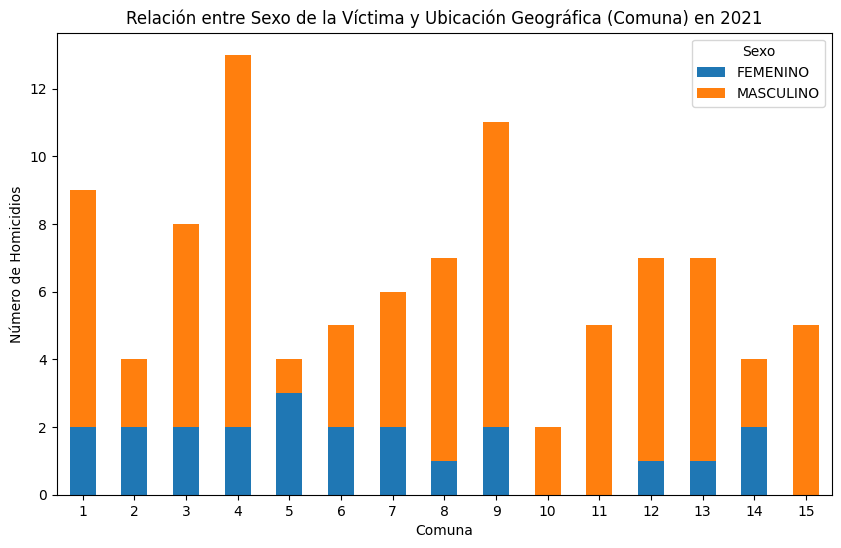

In [38]:
# Filtrar los datos para el último año disponible en el dataset
ultimo_año = homicidios_df['AÑO'].max()
datos_ultimo_año = homicidios_df[homicidios_df['AÑO'] == ultimo_año]

# Análisis de la relación entre el sexo de la víctima y ubicación geográfica para el último año
sexo_ubicacion_ultimo_año = pd.crosstab(datos_ultimo_año['COMUNA'], datos_ultimo_año['SEXO'])

# Graficar el análisis para el último año con barras apiladas
sexo_ubicacion_ultimo_año.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title(f'Relación entre Sexo de la Víctima y Ubicación Geográfica (Comuna) en {ultimo_año}')
plt.xlabel('Comuna')
plt.ylabel('Número de Homicidios')
plt.legend(title='Sexo')
plt.xticks(rotation=0)
plt.show()



### Observaciones

* Aunque como vimos anteriomente la mayoría de los casos son masculinos, se puede evidenciar que en las comunas dos y cinco hay una alta participación de las mujeres como víctimas mortales de los siniestros.

* En la Comuna 15, todos los casos se concentran en la población masculina y en la comuna 4 donde se registraron la mayoría de los casos para el 2021 también la mayoría de población es masculina.

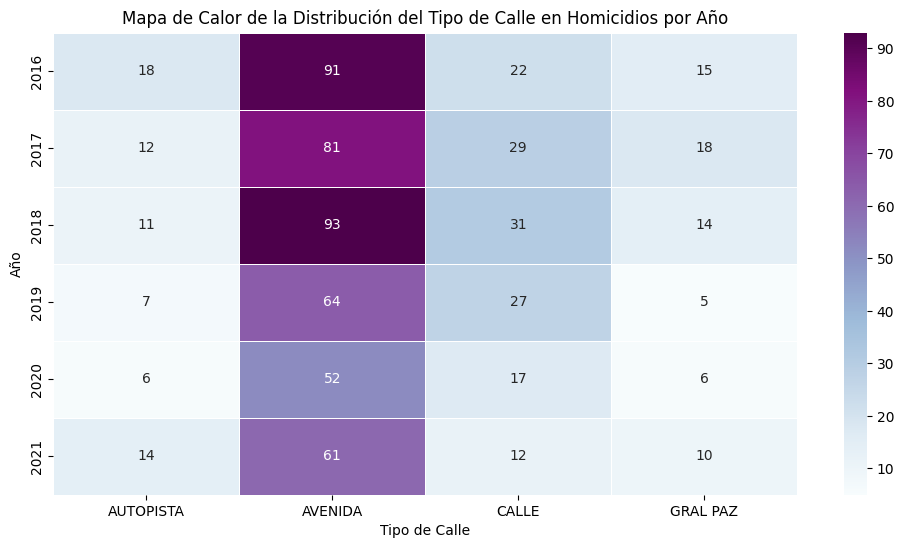

In [39]:
# Análisis de tipo de calle a lo largo de los años
tipo_calle_por_año = pd.crosstab(homicidios_df['AÑO'], homicidios_df['TIPO_DE_CALLE'])

# Crear un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(tipo_calle_por_año, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Mapa de Calor de la Distribución del Tipo de Calle en Homicidios por Año')
plt.xlabel('Tipo de Calle')
plt.ylabel('Año')
plt.show()


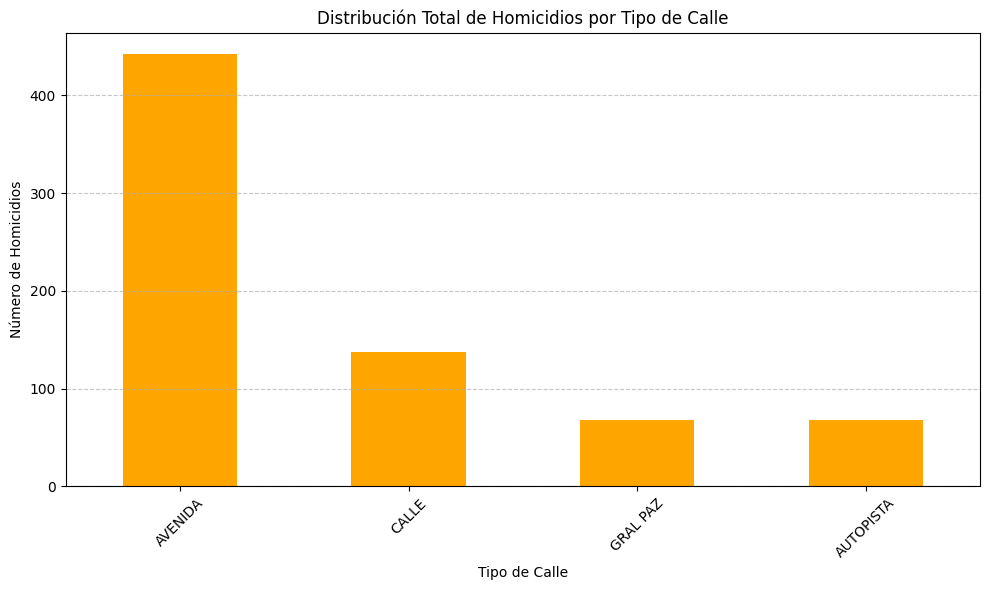

In [40]:
# Contar la cantidad de homicidios por tipo de calle
homicidios_por_tipo_calle = homicidios_df['TIPO_DE_CALLE'].value_counts()

# Gráfica de barras para la distribución de homicidios por tipo de calle
plt.figure(figsize=(10, 6))
homicidios_por_tipo_calle.plot(kind='bar', color='orange')
plt.title('Distribución Total de Homicidios por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observaciones

* A pesar de que hay un disminución general de accidentes viales mortales, la participación del tipo de calle 'AVENIDA' es muy superior al resto de los tipos de calle.

* Es importante considerar que si AVENIDA es un tipo de calle que es bastante común en CABA entonces es normal que aparezca con esta participación, lo que se hace necesario revisar si en términos númericos de infraestructura este es el caso.

* Teniendo este resultado también los enfoques de señalización, educación vial y seguridad en AVENIDA serían adecuados para bajar el indicador.

## Índices de Mortalidad

In [82]:
# Cargar el nuevo archivo de población
file_path_poblacion = '../data/Poblacion CABA por Comuna y Sexo 2010-2021.xlsx'

# Vamos a leer el archivo Excel para ver cómo están estructurados los datos
poblacion_total = pd.read_excel(file_path_poblacion)

# Mostrar las primeras filas para entender la estructura de los datos
poblacion_total

,AÑO,COMUNA,SEXO,POBLACIÓN
0,2010,1,AMBOS,243946
1,2011,1,AMBOS,245308
2,2012,1,AMBOS,246689
3,2013,1,AMBOS,248069
4,2014,1,AMBOS,249433
...,...,...,...,...
535,2017,15,FEMENINO,97092
536,2018,15,FEMENINO,97082
537,2019,15,FEMENINO,97073
538,2020,15,FEMENINO,97067


In [73]:
# Procesando los datos de población
poblacion_df = poblacion_total[poblacion_total['SEXO'] == 'AMBOS']
total_poblacion_año = poblacion_df.groupby('AÑO')['POBLACIÓN'].sum()

# Procesando los datos de homicidios
homicidios_df.loc[:,'SEMESTRE'] = homicidios_df['FECHA'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
homicidios_semestre = homicidios_df.groupby(['AÑO', 'SEMESTRE']).size()

# Calculando la tasa de mortalidad
tasa_mortalidad = pd.DataFrame(homicidios_semestre).reset_index()
tasa_mortalidad.columns = ['AÑO', 'SEMESTRE', 'N_HOMICIDIOS']

# Procediendo con el cálculo de la tasa de mortalidad
tasa_mortalidad['TASA_MORTALIDAD'] = tasa_mortalidad.apply(
    lambda row: (row['N_HOMICIDIOS'] / total_poblacion_año[row['AÑO']]) * 100000, axis=1
)

# Asegurándonos de que los datos están ordenados por año y semestre
tasa_mortalidad = tasa_mortalidad.sort_values(by=['AÑO', 'SEMESTRE'])

# Calculando la variación porcentual de la tasa de mortalidad en comparación con el semestre anterior
tasa_mortalidad['VAR %'] = tasa_mortalidad['TASA_MORTALIDAD'].pct_change() * 100

tasa_mortalidad

,AÑO,SEMESTRE,N_HOMICIDIOS,TASA_MORTALIDAD,VAR %
0,2016,1,65,2.124793,NaN
1,2016,2,81,2.647819,24.615385
2,2017,1,69,2.252158,-14.942882
3,2017,2,71,2.317438,2.898551
4,2018,1,70,2.281585,-1.547113
5,2018,2,79,2.574931,12.857143
6,2019,1,57,1.855451,-27.941719
7,2019,2,46,1.497382,-19.298246
8,2020,1,31,1.007918,-32.687949
9,2020,2,50,1.625675,61.290323


In [77]:
# Procesando población por comuna
poblacion_comuna = poblacion_df.groupby(['AÑO', 'COMUNA'])['POBLACIÓN'].sum()

# Agrupando por comuna, año y semestre, y contando el número de homicidios
homicidios_comuna_semestre = homicidios_df.groupby(['COMUNA', 'AÑO', 'SEMESTRE']).size()

# Eliminando registros de la "comuna 0" en los datos de homicidios
tasa_mortalidad_comuna = pd.DataFrame(homicidios_comuna_semestre).reset_index()
tasa_mortalidad_comuna.columns = ['COMUNA', 'AÑO', 'SEMESTRE', 'N_HOMICIDIOS']
tasa_mortalidad_comuna = tasa_mortalidad_comuna[tasa_mortalidad_comuna['COMUNA'] != 0]

# Calculando la tasa de mortalidad por semestre para cada comuna
tasa_mortalidad_comuna['TASA_MORTALIDAD'] = tasa_mortalidad_comuna.apply(
    lambda row: (row['N_HOMICIDIOS'] / poblacion_comuna[row['AÑO'], row['COMUNA']]) * 100000, axis=1)

# Calculando la variación porcentual de la tasa de mortalidad en comparación con el semestre anterior para cada comuna
tasa_mortalidad_comuna['VAR %'] = tasa_mortalidad_comuna.groupby('COMUNA')['TASA_MORTALIDAD'].pct_change() * 100

# Ordenando por comuna, año y semestre
tasa_mortalidad_comuna.sort_values(by=['COMUNA', 'AÑO', 'SEMESTRE'], inplace=True)

tasa_mortalidad_comuna

,COMUNA,AÑO,SEMESTRE,N_HOMICIDIOS,TASA_MORTALIDAD,VAR %
1,1,2016,1,12,4.760903,NaN
2,1,2016,2,10,3.967420,-16.666667
3,1,2017,1,13,5.132842,29.374820
4,1,2017,2,7,2.763838,-46.153846
5,1,2018,1,9,3.537625,27.996817
...,...,...,...,...,...,...
165,15,2019,1,2,1.096221,-33.339911
166,15,2019,2,7,3.836773,250.000000
167,15,2020,1,3,1.644151,-57.147555
168,15,2020,2,4,2.192201,33.333333


In [85]:
# Filtrando los datos de población para excluir la categoría 'AMBOS'
poblacion_año_sexo = poblacion_total[poblacion_total['SEXO'] != 'AMBOS'].groupby(['AÑO', 'SEXO'])['POBLACIÓN'].sum()

# Agrupando los datos de homicidios por año, semestre y sexo
homicidios_semestre_sexo = homicidios_df[homicidios_df['SEXO'].isin(['MASCULINO', 'FEMENINO'])].groupby(['AÑO', 'SEMESTRE', 'SEXO']).size()

# Calculando la tasa de mortalidad por semestre y año para cada sexo
tasa_mortalidad_semestre_sexo = pd.DataFrame(homicidios_semestre_sexo).reset_index()
tasa_mortalidad_semestre_sexo.columns = ['AÑO', 'SEMESTRE', 'SEXO', 'N_HOMICIDIOS']
tasa_mortalidad_semestre_sexo['TASA_MORTALIDAD'] = tasa_mortalidad_semestre_sexo.apply(
    lambda row: (row['N_HOMICIDIOS'] / poblacion_año_sexo[row['AÑO'], row['SEXO']]) * 100000, axis=1)

# Ordenando por sexo, año y semestre para calcular la variación porcentual correctamente
tasa_mortalidad_semestre_sexo.sort_values(by=['SEXO', 'AÑO', 'SEMESTRE'], inplace=True)

# Calculando la variación porcentual de la tasa de mortalidad en comparación con el semestre anterior
tasa_mortalidad_semestre_sexo['VARIACION_PORCENTUAL'] = tasa_mortalidad_semestre_sexo.groupby('SEXO')['TASA_MORTALIDAD'].pct_change() * 100

# Mostrando registros para verificar
tasa_mortalidad_semestre_sexo


,AÑO,SEMESTRE,SEXO,N_HOMICIDIOS,TASA_MORTALIDAD,VARIACION_PORCENTUAL
0,2016,1,FEMENINO,11,0.675430,NaN
2,2016,2,FEMENINO,16,0.982444,45.454545
4,2017,1,FEMENINO,14,0.859209,-12.543712
6,2017,2,FEMENINO,22,1.350186,57.142857
8,2018,1,FEMENINO,20,1.226913,-9.130059
10,2018,2,FEMENINO,18,1.104222,-10.000000
12,2019,1,FEMENINO,13,0.797214,-27.803111
14,2019,2,FEMENINO,14,0.858538,7.692308
16,2020,1,FEMENINO,6,0.367850,-57.153945
18,2020,2,FEMENINO,10,0.613083,66.666667


In [88]:
# Agrupando los datos de homicidios por año y tipo de víctima
homicidios_año_victima = homicidios_df.groupby(['AÑO', 'VICTIMA']).size()

# Calculando la tasa de mortalidad por tipo de víctima y año
# Primero, convertimos el conteo de homicidios a un DataFrame
tasa_mortalidad_victima = pd.DataFrame(homicidios_año_victima).reset_index()
tasa_mortalidad_victima.columns = ['AÑO', 'VICTIMA', 'N_HOMICIDIOS']

# Usando la población total por año (sin desglosar por sexo o comuna)
# Ya que los datos de población son para CABA en general, usamos la suma de población de todas las comunas
total_poblacion_año = poblacion_total[poblacion_total['SEXO'] == 'AMBOS'].groupby('AÑO')['POBLACIÓN'].sum()

# Calculando la tasa de mortalidad
tasa_mortalidad_victima['TASA_MORTALIDAD'] = tasa_mortalidad_victima.apply(
    lambda row: (row['N_HOMICIDIOS'] / total_poblacion_año[row['AÑO']]) * 100000, axis=1)

# Calculando la variación anual de la tasa de mortalidad para cada tipo de víctima
tasa_mortalidad_victima['VARIACION_ANUAL'] = tasa_mortalidad_victima.groupby('VICTIMA')['TASA_MORTALIDAD'].pct_change() * 100

# Mostrando los primeros registros para verificar
tasa_mortalidad_victima

,AÑO,VICTIMA,N_HOMICIDIOS,TASA_MORTALIDAD,VARIACION_ANUAL
0,2016,AUTO,18,0.588404,NaN
1,2016,BICICLETA,4,0.130756,NaN
2,2016,CARGAS,3,0.098067,NaN
3,2016,MOTO,65,2.124793,NaN
4,2016,MOVIL,1,0.032689,NaN
5,2016,PASAJEROS,1,0.032689,NaN
6,2016,PEATON,49,1.601767,NaN
7,2016,SD,5,0.163446,NaN
8,2017,AUTO,23,0.750719,27.585677
9,2017,BICICLETA,4,0.130560,-0.150340
